# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# Making Data Ready

## Loading Data

In [2]:
train= pd.read_csv('train.csv')
test= pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

## About the Data

The dataset contains player statistics for NRB Rookies. There are 1100+ observations in the train dataset with 19 variables excluding the target variable (i.e. Target).

<ul><p >
	<li><p >
	<p >GP: Games Played (here you might find some values in decimal, consider them to be the floor integer, for example, if the value is 12.789, the number of games played by the player is 12)</p>
	</p></li>
</p></ul>
<ul><p >
	<li><p >
	<p >MIN:&nbsp; Minutes Played</p>
	</p></li>
	<li><p >
	<p >PTS: Number of points per game</p>
	</p></li>
	<li><p >
	<p >FGM: Field goals made</p>
	</p></li>
	<li><p >
	<p >FGA: Field goals attempt</p>
	</p></li>
	<li><p >
	<p >FG%: field goals percent</p>
	</p></li>
	<li><p >
	<p >3P Made: 3 point made</p>
	</p></li>
	<li><p >
	<p >3PA: 3 points attempt</p>
	</p></li>
	<li><p >
	<p >3P%: 3 point percent</p>
	</p></li>
	<li><p >
	<p >FTM: Free throw made</p>
	</p></li>
	<li><p >
	<p >FTA: Free throw attempts</p>
	</p></li>
	<li><p >
	<p >FT%: Free throw percent</p>
	</p></li>
	<li><p >
	<p >OREB: Offensive rebounds</p>
	</p></li>
	<li><p >
	<p >DREB: Defensive rebounds</p>
	</p></li>
	<li><p >
	<p >REB: Rebounds</p>
	</p></li>
	<li><p >
	<p >AST: Assists</p>
	</p></li>
	<li><p >
	<p >STL: Steals</p>
	</p></li>
	<li><p >
	<p >BLK: Blocks</p>
	</p></li>
	<li><p >
	<p >TOV: Turnovers</p>
	</p></li>
	<li><p >
	<p >Target: 0 if career years played &lt; 5, 1 if career years played &gt;= 5</p>
	</p></li>
</p></ul>

## Preliminary Analysis

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   GP       1101 non-null   float64
 1   MIN      1101 non-null   float64
 2   PTS      1101 non-null   float64
 3   FGM      1101 non-null   float64
 4   FGA      1101 non-null   float64
 5   FG%      1101 non-null   float64
 6   3P Made  1101 non-null   float64
 7   3PA      1101 non-null   float64
 8   3P%      1101 non-null   float64
 9   FTM      1101 non-null   float64
 10  FTA      1101 non-null   float64
 11  FT%      1101 non-null   float64
 12  OREB     1101 non-null   float64
 13  DREB     1101 non-null   float64
 14  REB      1101 non-null   float64
 15  AST      1101 non-null   float64
 16  STL      1101 non-null   float64
 17  BLK      1101 non-null   float64
 18  TOV      1101 non-null   float64
 19  Target   1101 non-null   int64  
dtypes: float64(19), int64(1)
memory usage: 172.2 KB


In [4]:
train.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,Target
count,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000
mean,59.008156,16.928284,6.502344,2.511125,5.645747,43.912555,0.241959,0.767455,19.050425,1.241914,1.741848,70.495847,0.958240,1.937014,2.891927,1.472706,0.589403,0.344204,1.150499,0.499546
std,17.236886,8.034209,4.163856,1.611502,3.422292,6.106910,0.363008,1.017214,15.513640,0.937585,1.272047,10.381068,0.771344,1.342627,2.039694,1.376592,0.386147,0.418840,0.687706,0.500227
min,11.000000,3.100000,1.100000,0.400000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,46.223257,10.492268,3.587756,1.400000,3.200000,40.000000,0.000000,0.000000,0.000000,0.600000,0.900000,64.900000,0.400000,1.000000,1.400000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,59.387147,15.386486,5.200000,2.000000,4.600000,43.652785,0.100000,0.300000,22.600000,1.000000,1.400000,71.502462,0.700000,1.600000,2.273596,1.041951,0.500000,0.200000,0.988945,0.000000
75%,76.000000,21.830403,8.300000,3.200000,6.900000,47.700000,0.400000,1.195634,32.300000,1.600000,2.200000,77.436718,1.300000,2.500000,3.700000,1.900000,0.800000,0.400000,1.400000,1.000000
max,82.000000,40.900000,24.300000,9.000000,18.900000,73.700000,2.300000,6.500000,100.000000,7.500000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.200000,1.000000


In [5]:
train.isna().sum()

GP         0
MIN        0
PTS        0
FGM        0
FGA        0
FG%        0
3P Made    0
3PA        0
3P%        0
FTM        0
FTA        0
FT%        0
OREB       0
DREB       0
REB        0
AST        0
STL        0
BLK        0
TOV        0
Target     0
dtype: int64

In [6]:
test.isna().sum()

GP         0
MIN        0
PTS        0
FGM        0
FGA        0
FG%        0
3P Made    0
3PA        0
3P%        0
FTM        0
FTA        0
FT%        0
OREB       0
DREB       0
REB        0
AST        0
STL        0
BLK        0
TOV        0
dtype: int64

No null values!

In [7]:
train.dtypes

GP         float64
MIN        float64
PTS        float64
FGM        float64
FGA        float64
FG%        float64
3P Made    float64
3PA        float64
3P%        float64
FTM        float64
FTA        float64
FT%        float64
OREB       float64
DREB       float64
REB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
Target       int64
dtype: object

No categorical data. Means all we have to do is do some feature engineering (if we want) and then train the model.

We won't be doing a lot of EDA or feature engineering.

## Basics EDA and Feature Engineering

### Correlation

In [8]:
train.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,Target
0,59.0,12.8,3.4,1.3,2.6,51.0,0.2,0.3,50.0,0.7,0.8,78.0,1.1,2.3,3.3,0.5,0.3,0.4,0.5,1
1,31.0,10.7,3.4,1.2,3.3,35.3,0.5,2.1,25.8,0.5,0.9,55.2,0.3,1.1,1.4,0.4,0.3,0.1,0.2,0
2,48.0,9.3,4.5,1.7,3.4,49.7,0.0,0.1,0.0,1.2,1.9,61.5,0.4,0.8,1.2,0.8,0.5,0.4,1.0,0
3,80.0,27.7,11.2,3.5,9.4,37.4,1.3,4.1,32.9,2.8,3.3,85.0,0.8,1.6,2.4,3.9,1.3,0.1,2.2,1
4,58.0,18.4,5.8,1.9,5.3,36.7,0.0,0.1,25.0,1.9,3.1,61.7,0.5,0.7,1.2,1.9,1.1,0.2,1.7,0


In [9]:
train["Target"].value_counts()

0    551
1    550
Name: Target, dtype: int64

The dataset is balanced. Another thing we don't have to worry about.

In [10]:
plt.rcdefaults()

<AxesSubplot:>

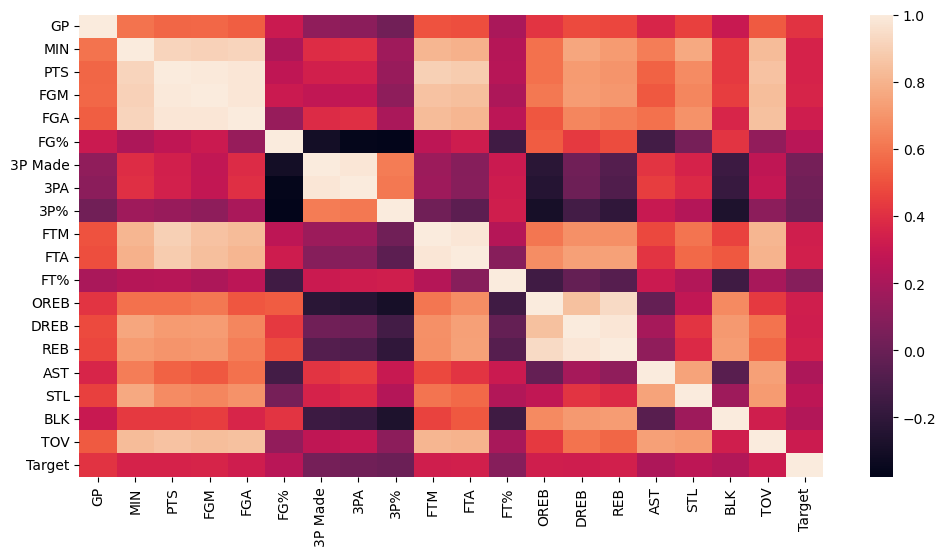

In [11]:
plt.figure(figsize=(12,6))
sns.heatmap(train.corr())

In [12]:
target_corr = train.corr()["Target"].sort_values(ascending=False)[1:]
target_corr

GP         0.410299
FGM        0.356119
PTS        0.354192
MIN        0.354152
REB        0.338257
FTA        0.334718
FTM        0.333098
OREB       0.329306
FGA        0.327988
DREB       0.323428
TOV        0.314013
STL        0.268398
FG%        0.252236
BLK        0.227312
AST        0.213621
FT%        0.088597
3P Made    0.037159
3PA        0.018759
3P%        0.001285
Name: Target, dtype: float64

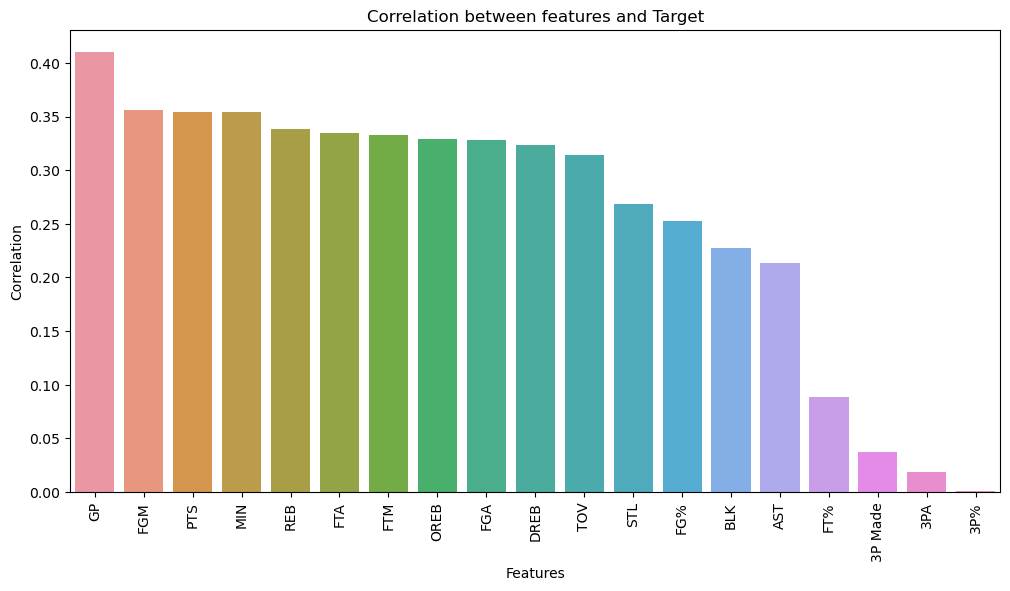

In [13]:
plt.figure(figsize=(12,6))
sns.barplot(x = target_corr.index, y = target_corr.values)
plt.title('Correlation between features and Target')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=90);

It seems that the target is highly correlated with the number of games played, Field goals made, Number of points per game, number of minutes etc. Let's make some scatterplots related to these features.

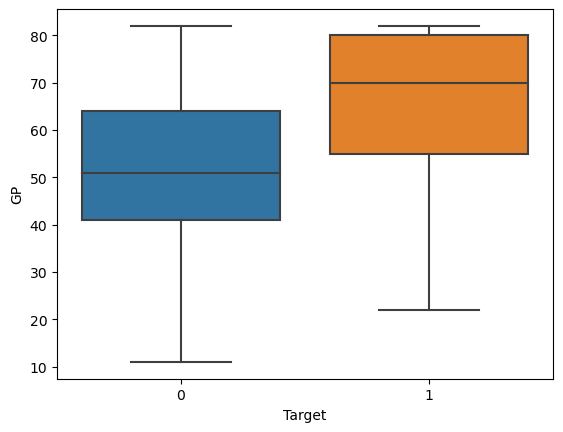

In [14]:
sns.boxplot(x = "Target", y = "GP", data = train);

We can see that having played more games is definitely a good way to make sure the player's life flourishes.

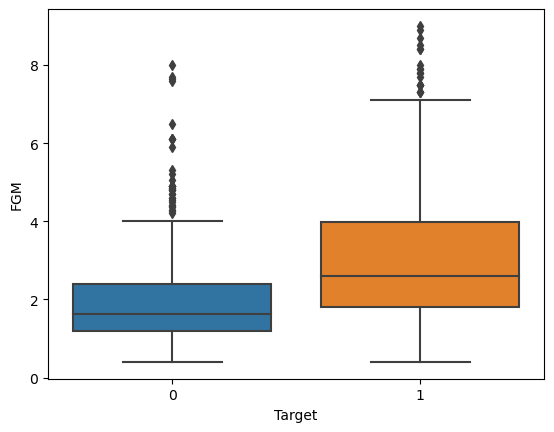

In [15]:
sns.boxplot(x = "Target", y = "FGM", data = train);

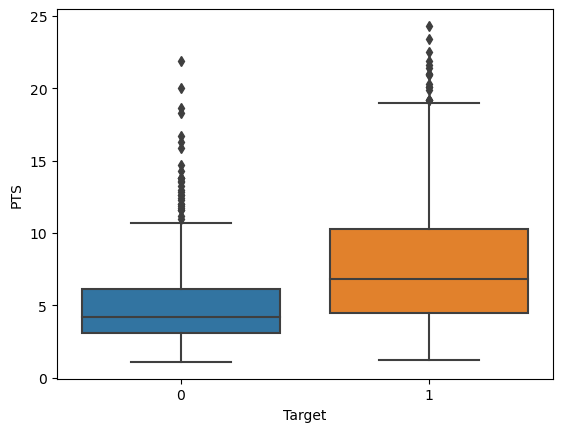

In [16]:
sns.boxplot(x = "Target", y = "PTS", data = train);

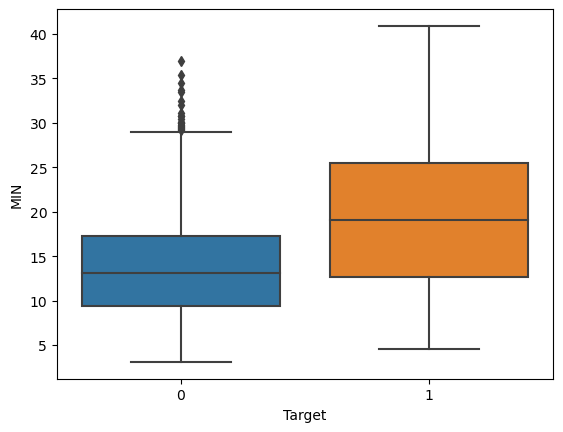

In [17]:
sns.boxplot(x = "Target", y = "MIN", data = train);

The same is true for the field goals made, number of points per game and number of minutes.

We can do a lot more, in terms of EDA but these will be all for now! Let's create some models, shall we? Of course, we need to do some preprocessing first.

## Train Test Split and Scaling

### Train Test Split

We'll take 20% of the train data as validation data.

In [18]:
X = train.drop(["Target"], axis=1)
y = train["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((880, 19), (221, 19), (880,), (221,))

### Scaling

We need to scale the data. We'll use the StandardScaler.

In [19]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
X_train.mean(), X_train.std()

(-4.0371746350005693e-17, 1.0)

Great! Now we have everything we need to create our model.

# Modeling

## Some Functions

Let's create som functions to make our lives easier.

In [21]:
def evaluate_model(model,data="test"):
    """
    Evaluates a model using the confusion matrix and classification report.

    Parameters
    ----------
    model : sklearn model
        The model to evaluate.
    data : str|tuple
        The data to use for evaluation. Possible values are:
        - "test" : use the test data
        - "train" : use the training data
        - tuple : use the data in the tuple. Should be a tuple of the form (X, y)

    Returns
    -------
    None
    """
    if data == "test":
        X, y = X_test, y_test
    elif data=="train":
        X, y = X_train, y_train
    else:
        X, y = data[0], data[1]
    y_pred = model.predict(X)
    print(classification_report(y, y_pred))
    cm = confusion_matrix(y, y_pred)
    cmp = ConfusionMatrixDisplay(cm)
    fig, ax = plt.subplots(figsize=((6, 6)))
    cmp.plot(ax=ax, xticks_rotation='vertical')
    print("Accuracy:", accuracy_score(y, y_pred))

## Base Model

Our base model will be a simple linear regression model with default parameters.

In [22]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.67      0.66      0.66       109
           1       0.67      0.68      0.68       112

    accuracy                           0.67       221
   macro avg       0.67      0.67      0.67       221
weighted avg       0.67      0.67      0.67       221

Accuracy: 0.669683257918552


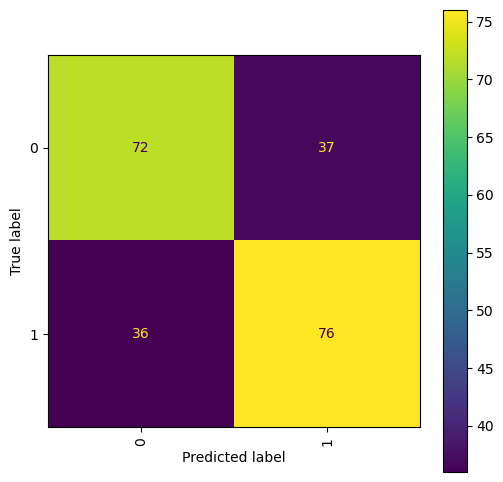

In [23]:
evaluate_model(lr)

              precision    recall  f1-score   support

           0       0.70      0.73      0.72       442
           1       0.72      0.69      0.70       438

    accuracy                           0.71       880
   macro avg       0.71      0.71      0.71       880
weighted avg       0.71      0.71      0.71       880

Accuracy: 0.7090909090909091


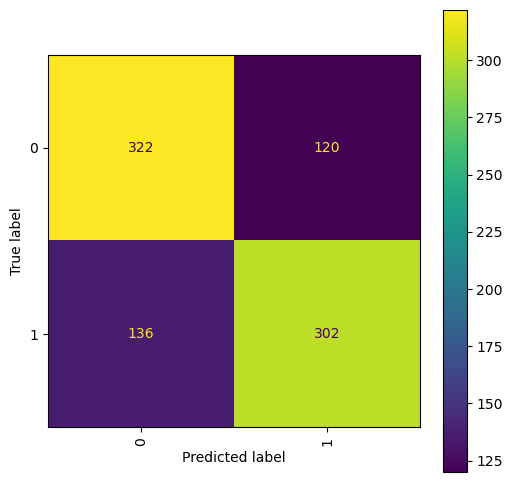

In [24]:
evaluate_model(lr, data="train")

Okay, our base model is performing very poorly. Not to worry, this is just the base model. Next, let's try polynomial regression.

## Polynomial Regression

In [25]:
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [26]:
lr_poly = LogisticRegression(max_iter=1000)
lr_poly.fit(X_train_poly, y_train)

LogisticRegression(max_iter=1000)

              precision    recall  f1-score   support

           0       0.65      0.75      0.69       109
           1       0.71      0.60      0.65       112

    accuracy                           0.67       221
   macro avg       0.68      0.68      0.67       221
weighted avg       0.68      0.67      0.67       221

Accuracy: 0.6742081447963801


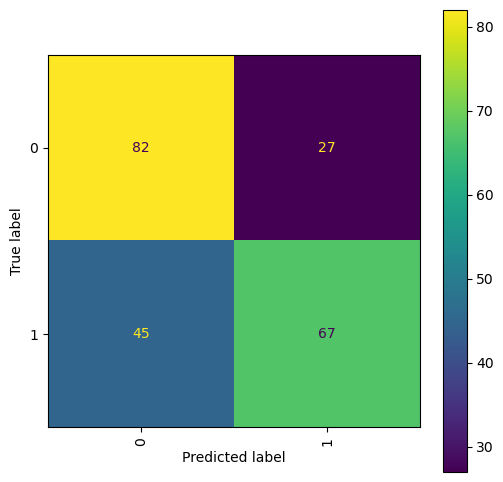

In [27]:
evaluate_model(lr_poly, data=(X_test_poly, y_test))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       442
           1       0.96      0.93      0.95       438

    accuracy                           0.95       880
   macro avg       0.95      0.95      0.95       880
weighted avg       0.95      0.95      0.95       880

Accuracy: 0.9477272727272728


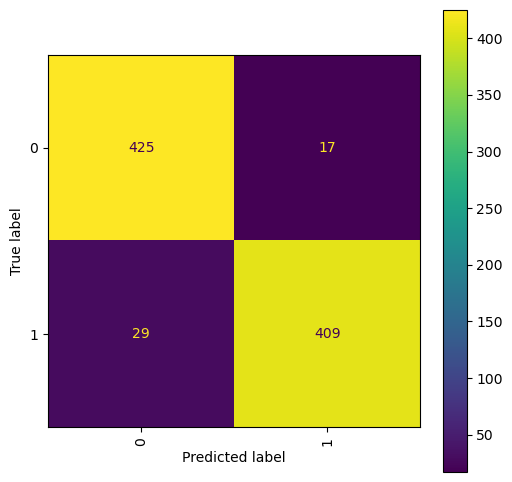

In [28]:
evaluate_model(lr_poly, data=(X_train_poly, y_train))

Second degree polynomial was underfitting while third degree polynomial is overfitting. Let's try some non-linear models.

## Support Vector Machine

In [29]:
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
scaler = StandardScaler()
scaler.fit(X_train_poly)
X_train_poly = scaler.transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)

In [30]:
svc = SVC(kernel="rbf", C=10)
svc.fit(X_train, y_train)

SVC(C=10)

              precision    recall  f1-score   support

           0       0.65      0.73      0.69       109
           1       0.70      0.61      0.65       112

    accuracy                           0.67       221
   macro avg       0.67      0.67      0.67       221
weighted avg       0.67      0.67      0.67       221

Accuracy: 0.669683257918552


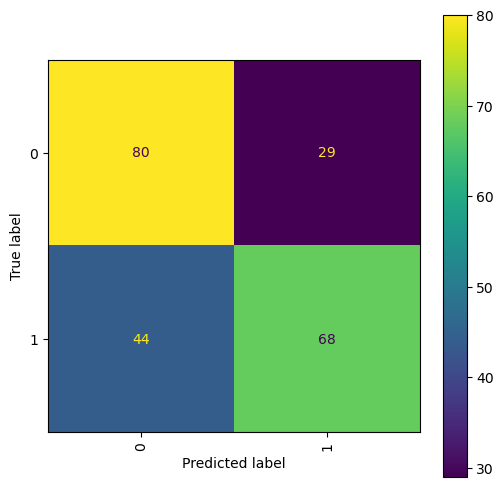

In [31]:
evaluate_model(svc, data=(X_test, y_test))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       442
           1       0.88      0.75      0.81       438

    accuracy                           0.82       880
   macro avg       0.83      0.82      0.82       880
weighted avg       0.83      0.82      0.82       880

Accuracy: 0.825


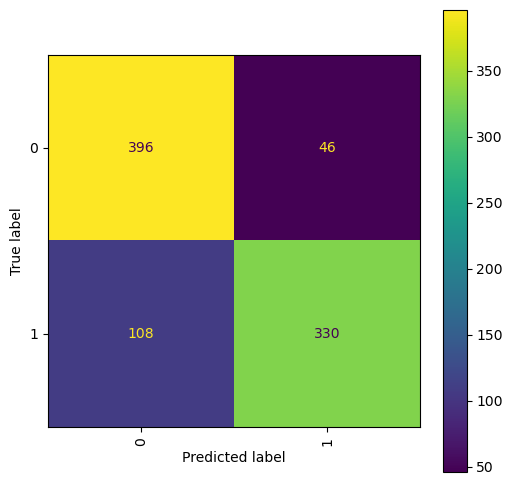

In [32]:
evaluate_model(svc, data=(X_train, y_train))

Interesting! Even support vector machine is not performing well. 

## Others

In [46]:
xgbc = XGBClassifier(n_estimators=250, max_depth=2, learning_rate=0.1)
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=250,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

              precision    recall  f1-score   support

           0       0.74      0.74      0.74       109
           1       0.75      0.75      0.75       112

    accuracy                           0.75       221
   macro avg       0.75      0.75      0.75       221
weighted avg       0.75      0.75      0.75       221

Accuracy: 0.746606334841629


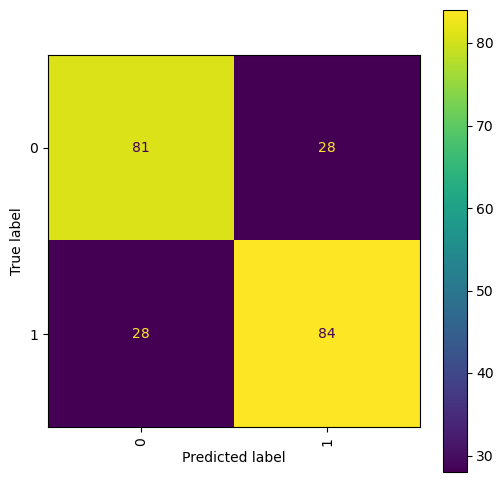

In [47]:
evaluate_model(xgbc, data=(X_test, y_test))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       442
           1       0.88      0.86      0.87       438

    accuracy                           0.87       880
   macro avg       0.87      0.87      0.87       880
weighted avg       0.87      0.87      0.87       880

Accuracy: 0.8704545454545455


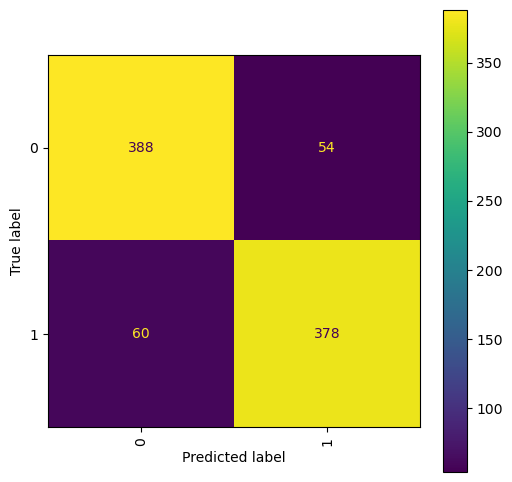

In [48]:
evaluate_model(xgbc, data=(X_train, y_train))

In [73]:
dtc = DecisionTreeClassifier(max_depth=3)

In [74]:
adbc = AdaBoostClassifier(base_estimator=dtc, n_estimators=500)
adbc.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   n_estimators=500)

              precision    recall  f1-score   support

           0       0.68      0.69      0.68       109
           1       0.69      0.68      0.68       112

    accuracy                           0.68       221
   macro avg       0.68      0.68      0.68       221
weighted avg       0.68      0.68      0.68       221

Accuracy: 0.6832579185520362


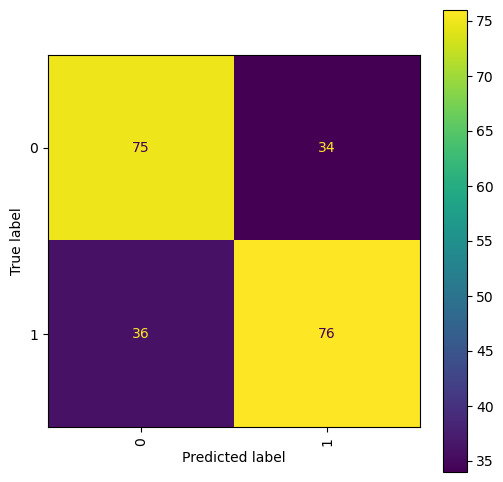

In [75]:
evaluate_model(adbc, data=(X_test, y_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       442
           1       1.00      0.98      0.99       438

    accuracy                           0.99       880
   macro avg       0.99      0.99      0.99       880
weighted avg       0.99      0.99      0.99       880

Accuracy: 0.9920454545454546


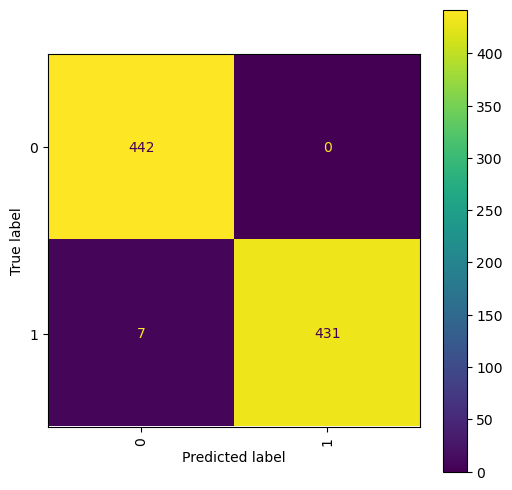

In [76]:
evaluate_model(adbc, data=(X_train, y_train))

In [77]:
gbc = GradientBoostingClassifier(n_estimators=250, max_depth=2, learning_rate=0.1)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=2, n_estimators=250)

              precision    recall  f1-score   support

           0       0.73      0.73      0.73       109
           1       0.74      0.74      0.74       112

    accuracy                           0.74       221
   macro avg       0.74      0.74      0.74       221
weighted avg       0.74      0.74      0.74       221

Accuracy: 0.7375565610859729


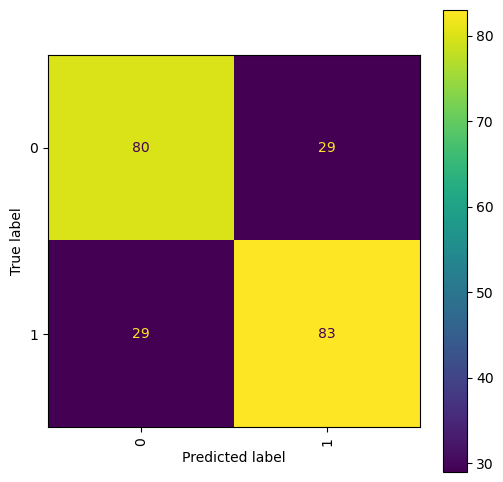

In [79]:
evaluate_model(gbc, data=(X_test, y_test))

In [80]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
import tensorflow.keras.layers as tfl

In [117]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
X_train_poly.shape, X_test_poly.shape

((880, 209), (221, 209))

In [121]:
model = Sequential()
model.add(tfl.Dense(units=32, activation="relu", input_shape=(X_train_poly.shape[1],)))
model.add(tfl.Dense(units=64, activation="relu"))
model.add(tfl.Dropout(0.5))
# model.add(tfl.Dense(units=128, activation="relu"))
# model.add(tfl.Dropout(0.5))
model.add(tfl.Dense(units=1, activation="sigmoid"))
model.summary()
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 32)                6720      
_________________________________________________________________
dense_37 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 65        
Total params: 8,897
Trainable params: 8,897
Non-trainable params: 0
_________________________________________________________________


In [122]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=True, world_readable=True)

In [123]:
history=model.fit(X_train_poly, y_train, epochs=50, batch_size=32, validation_data=(X_test_poly, y_test), verbose=0)

In [124]:
pd.DataFrame(history.history).iplot(kind="line")